# This is a kinematic example for an articulated robot arm with 6 joints

As a basic example think of a cube, that is to be processed in several steps to transfer it from its initial state to a defined target state.

Initial state of cube:

<center>
<img src="images/initial_cube.PNG" width="400" alt="initial state" >
</center>

After the 1st processing step the cube is supposed to look like this:

1st intermediate state of cube:

<center>
<img src="images/cut_cube_circular.PNG" width="400" alt="cut state">
</center>

To calculate the tool path for the robot to execute this processing, a CAD/CAM system compares these two CAD-files and determines the tool path for a specific milling tool, that is required to execute this processing step. In this case, this tool path would just be a straight line in Cartesian space. The motion commands needed by the robot control to execute the planned tool path are stored in a nc-file. This is send to the robot control and there transformed from operating space (Cartesian) to joint space (angular). Let's do this step by step, until we know the joint angles.

First of all the kinematics of the robot are initialized specifying its link lengths.

In [1]:
import RobotClass as rc
import warnings
%matplotlib widget
warnings.filterwarnings('ignore')

# these are part of the Denavit-Hartenber-parameter that define the kinematics of a manipulator

# nominal link lengths
dh_parameter = {
    'l11': 550,
    'l12': 450,
    'l2': 860,
    'l3': 210,
    'l4': 762,
    'l5': 0,
    'l6': 210
}

robot1 = rc.robot(dh_parameter)



 robot kinematics initialized!



Then the $n$ positions ($x$, $y$, $z$) and orientations ($\alpha$, $\beta$, $\gamma$) of the Tool Center Point (TCP) of the robot for the needed circular motion in Cartesian space are obtained here by circular interpolation between the start and end points (these coordinates would otherwise be calculated by the CAD/CAM system).

In [2]:
tool_path = robot1.circular_interpolation(
    100,                                        # radius
    [1000, 500, 1000],                            # center
    90, 0, 0,                                    # normal vector orientation (alpha, beta, gamma)
    [90, 0, 90], [90, 0, 90],                   # start and end point orientation (alpha, beta, gamma)  
    100                                          # number of points
)



 circular motion interpolated!



Now let's have a look at the tool path. You can go along the path by pushing the slider.

interactive(children=(IntSlider(value=49, description='step', max=99), Checkbox(value=False, description='mark…



 tool path in cartesian space plotted!



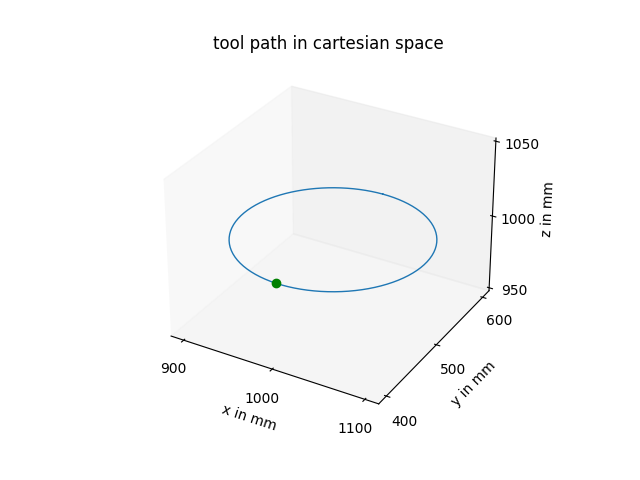

In [3]:
robot1.plot_tool_path([tool_path])

Not surprisingly, it's a perfect circular line in Cartesian space. Now applying the inverse kinematic transformation the joint angles corresponding to the TCP path are determined.

In [46]:
joint_angles_1 = robot1.inverse(tool_path)



 inverse kinematics calculated!



Again, let's have a look at them.

In [47]:
robot1.plot_joint_space(joint_angles_1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …



 tool path in joint space plotted!



By calculating the forward (or direct) transformation we can determine the pose of every single joint frame. Conncting them with straight lines allows us to visualize the robot links. Again, you can move the robot along the tool path.

In [48]:
joint_frames_1 = robot1.direct(joint_angles_1)
robot1.plot_robot_and_path([joint_frames_1], [tool_path])



 direct kinematics calculated!



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=49, description='step', max=99), Checkbox(value=False, description='mark…



 tool path and robot in cartesian space plotted!



The interpolated blue tool path and the motion of the last frame of the robot (TCP) are coincident, because inverse and direct transformations were calculated with the same kinematic parameters. We can take a closer look at the two tool paths.

In [49]:
robot1.plot_tool_path([tool_path, joint_frames_1[:, -1, 0:3, 3]])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=49, description='step', max=99), Checkbox(value=False, description='mark…



 tool path in cartesian space plotted!



Now it is important to keep in mind, that these joint angles correspond to the nominal robot link lengths, that we specified earlier. If we redefine them slightly and then direct transform these joint angles to Cartesian space (as would be done by the physical real robot), the actual tool path would appear different.

In [50]:
# actual link lengths
dh_parameter = {
    'l11': 550+13,
    'l12': 450-5,
    'l2': 860+5,
    'l3': 210+4,
    'l4': 762+7,
    'l5': 0+2,
    'l6': 210+3
}

robot2 = rc.robot(dh_parameter)



 robot kinematics initialized!



We now calculate the direct transformation with these joint angles and simulate what the real robot would do.

In [51]:
joint_frames_2 = robot2.direct(joint_angles_1)
robot1.plot_robot_and_path([joint_frames_2], [tool_path])



 direct kinematics calculated!



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=49, description='step', max=99), Checkbox(value=False, description='mark…



 tool path and robot in cartesian space plotted!



Now the blue interpolated tool path and the motion of the TCP are no longer coincident.

Let's take a closer look at the tool path and the TCP motion.

In [52]:
robot1.plot_tool_path([tool_path, joint_frames_2[:, -1, 0:3, 3]])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=49, description='step', max=99), Checkbox(value=False, description='mark…



 tool path in cartesian space plotted!



If you want to get a feel for the robot, go wild!

In [53]:
robot1.plot_move_robot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='joint1', max=180, min=-180), IntSlider(value=0, descript…



 direct kinematics calculated!

